C:\Users\marcu\AppData\Local\Temp\ipykernel_22840\4272736838.py:41: RuntimeWarning: invalid value encountered in power
  V_alt = lambda t, k, V0 : (V0**(4/3) - k* t)**(3/4)
C:\Users\marcu\AppData\Local\Temp\ipykernel_22840\4272736838.py:47: RuntimeWarning: invalid value encountered in scalar power
  V_alt = lambda t : (par2[1]**(4/3) - par2[0]* t)**(3/4)


0.796637886441858

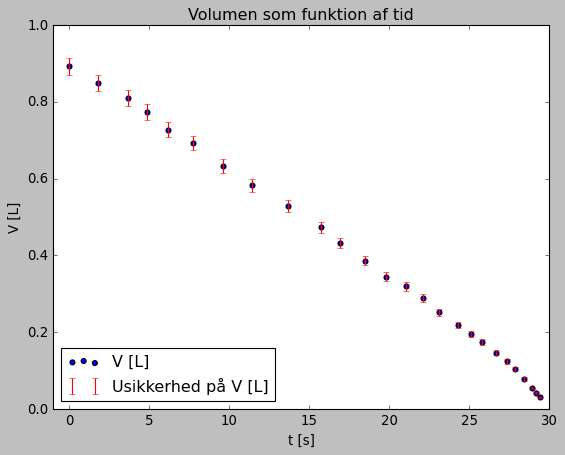

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.optimize import curve_fit

style.use("classic")

# Indlæs data
data = np.genfromtxt("langt_sugerør.csv", delimiter = ";", skip_header = 1)

t_arr = np.array([data[i][0] for i in range(len(data))])
V_arr = np.array([data[i][1] for i in range(len(data))])
dV_arr = np.array([data[i][2] for i in range(len(data))])

# Plot af målte værdier for V(t)
plt.figure(1)
plt.scatter(t_arr, V_arr, label="V [L]")
plt.errorbar(t_arr, V_arr, yerr=dV_arr, label="Usikkerhed på V [L]", fmt=" ", color="red")

plt.xlim(-1, 30)
plt.ylim(0,1)

ax = plt.gca()
ax.set_xlabel("t [s]")
ax.set_ylabel("V [L]")
ax.set_title("Volumen som funktion af tid")

plt.legend(loc="lower left")

# Lineært fit
# Generel forskrift
V_lin = lambda t, a, b : a * t + b

par, cov = curve_fit(V_lin, t_arr, V_arr, sigma = dV_arr, absolute_sigma=True)

# Erstat med fittet funktion
V_lin = lambda t : par[0] * t + par[1]

# Fit af ligning (1)
# Generel forskrift
V_alt = lambda t, k, V0 : (V0**(4/3) - k* t)**(3/4)

# Lav fit med gættet k = 0.001 og V0 sat til det målte V0
par2, cov2 = curve_fit(V_alt, t_arr, V_arr, sigma = dV_arr, absolute_sigma=True, p0=[0.001,V_arr[0]], maxfev=10000)

# Erstat med fittet funktion
V_alt = lambda t : (par2[1]**(4/3) - par2[0]* t)**(3/4)

# Plot de to funktioner
t_vals_arr = np.linspace(0, 30, 10000)
V_lin_arr = [V_lin(num) for num in t_vals_arr]
V_alt_arr = [V_alt(num) for num in t_vals_arr]


